In [5]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from datetime import datetime
from sklearn import preprocessing, model_selection, metrics, ensemble
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from eli5.sklearn import PermutationImportance

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [85]:
#Importing DataSets
train=pd.read_csv('C://Health care/Train.csv')
patient_df=pd.read_csv('C:/Health care/Patient_Profile.csv')
Health_camp_df=pd.read_csv('C://Health care/Health_Camp_Detail.csv')
first_healthcamp_df=pd.read_csv('C:/care/First_Health_Camp_Attended.csv')
second_healthcamp_df=pd.read_csv('C:/Second_Health_Camp_Attended.csv')
third_healthcamp_df=pd.read_csv('C:/Third_Health_Camp_Attended.csv')

test=pd.read_csv('C:/Test.csv')

In [86]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [87]:
patient_df.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others


In [88]:
Health_camp_df.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1


In [89]:
first_healthcamp_df.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [90]:
second_healthcamp_df.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


In [91]:
third_healthcamp_df.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


In [92]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75278 entries, 0 to 75277
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient_ID         75278 non-null  int64 
 1   Health_Camp_ID     75278 non-null  int64 
 2   Registration_Date  74944 non-null  object
 3   Var1               75278 non-null  int64 
 4   Var2               75278 non-null  int64 
 5   Var3               75278 non-null  int64 
 6   Var4               75278 non-null  int64 
 7   Var5               75278 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 4.6+ MB


In [94]:
#Let us find out the unique number of patients in train set
train.Patient_ID.nunique()

29828

In [95]:
train.groupby('Patient_ID')['Health_Camp_ID'].count().unique()

array([ 2,  1,  5,  4,  8, 14,  3,  6,  7,  9, 12, 13, 10, 19, 11, 22, 16,
       18, 20, 15, 23, 17, 28, 24, 21, 32, 25], dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

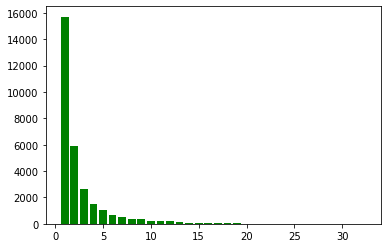

In [96]:
#There are 29898 unique patient ID's in a dataset of 75278 records which means many patients have registered for the camps more than 1 time.
#Let us look at the unique number of registrations a patient has made to the camps and its distribution
train_grouped = train.groupby('Patient_ID').agg('size').reset_index()
train_grouped.columns = ["Patient_ID", "Number_of_registrations_per_person"]
train_grouped = train_grouped.groupby('Number_of_registrations_per_person').agg('size').reset_index()
train_grouped.columns = ["Number_of_registrations_per_person", "Count"]
mpl.pyplot.bar(train_grouped.Number_of_registrations_per_person, train_grouped.Count, color='g')
mpl.pyplot.show

In [97]:
train['Registration_Date'] = pd.to_datetime(train['Registration_Date'], format="%d-%b-%y")

In [98]:
train_indexed = train.set_index('Registration_Date')
train_indexed

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5
Registration_Date,,,,,,,
2005-09-10,489652,6578,4,0,0,0,2
2005-08-18,507246,6578,45,5,0,0,7
2006-04-29,523729,6534,0,0,0,0,0
2004-02-07,524931,6535,0,0,0,0,0
2006-02-28,521364,6529,15,1,0,0,7
...,...,...,...,...,...,...,...
2005-01-03,500969,6539,0,0,0,0,0
2006-02-13,511952,6528,0,0,0,0,0
2005-05-24,521236,6554,0,0,0,0,0


In [99]:
train = train_indexed['2005':]
train = train.reset_index()
train

,Registration_Date,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5
0,2005-09-10,489652,6578,4,0,0,0,2
1,2005-08-18,507246,6578,45,5,0,0,7
2,2006-04-29,523729,6534,0,0,0,0,0
3,2006-02-28,521364,6529,15,1,0,0,7
4,2005-05-20,494493,6570,0,0,0,0,0
...,...,...,...,...,...,...,...,...
52838,2005-04-02,522723,6562,0,0,0,0,0
52839,2005-01-03,500969,6539,0,0,0,0,0
52840,2006-02-13,511952,6528,0,0,0,0,0
52841,2005-05-24,521236,6554,0,0,0,0,0


In [27]:
train['Registration_Date'] = train['Registration_Date'].apply(lambda x: x.toordinal())

In [100]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [101]:
test.head(10).append(test.tail(10))

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0
5,494067,6548,19-Jul-06,0,0,0,0,0
6,498974,6574,29-Jun-06,0,0,0,0,0
7,525212,6567,01-Feb-07,0,0,0,0,0
8,507387,6583,03-Aug-06,0,0,0,0,0
9,517714,6573,18-Sep-06,0,0,0,0,0


In [102]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35249 entries, 0 to 35248
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient_ID         35249 non-null  int64 
 1   Health_Camp_ID     35249 non-null  int64 
 2   Registration_Date  35249 non-null  object
 3   Var1               35249 non-null  int64 
 4   Var2               35249 non-null  int64 
 5   Var3               35249 non-null  int64 
 6   Var4               35249 non-null  int64 
 7   Var5               35249 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 2.2+ MB


In [103]:
#Let us find out the unique number of patients in test set
test.Patient_ID.nunique()

15324

In [104]:
test.groupby('Patient_ID')['Health_Camp_ID'].count().unique()

array([ 1,  5,  2,  4,  8,  3,  7,  6,  9, 10, 12, 13, 15, 14, 11, 17],
      dtype=int64)

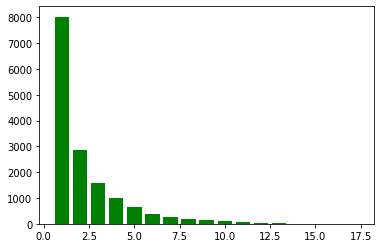

,Number_of_registrations_per_person,Count
0,1,8023
1,2,2877
2,3,1570
3,4,984
4,5,640
5,6,391
6,7,272
7,8,187
8,9,163
9,10,95


In [105]:
test_grouped = test.groupby('Patient_ID').agg('size').reset_index()
test_grouped.columns = ["Patient_ID", "Number_of_registrations_per_person"]
test_grouped = test_grouped.groupby('Number_of_registrations_per_person').agg('size').reset_index()
test_grouped.columns = ["Number_of_registrations_per_person", "Count"]
mpl.pyplot.bar(test_grouped.Number_of_registrations_per_person, test_grouped.Count, color='g')
mpl.pyplot.show()
test_grouped

In [106]:
#Converting date to numeric
test['Registration_Date'] = pd.to_datetime(test['Registration_Date'], format="%d-%b-%y")
test['Registration_Date'] = test['Registration_Date'].apply(lambda x: x.toordinal())

In [107]:
#Let us find out what all data contains null values
dataframes = [patient_df,Health_camp_df,first_healthcamp_df,second_healthcamp_df,third_healthcamp_df]
for i in dataframes:
  print(i.isnull().sum())

Patient_ID               0
Online_Follower          0
LinkedIn_Shared          0
Twitter_Shared           0
Facebook_Shared          0
Income                   0
Education_Score          0
Age                      0
First_Interaction        0
City_Type            23384
Employer_Category    34793
dtype: int64
Health_Camp_ID     0
Camp_Start_Date    0
Camp_End_Date      0
Category1          0
Category2          0
Category3          0
dtype: int64
Patient_ID           0
Health_Camp_ID       0
Donation             0
Health_Score         0
Unnamed: 4        6218
dtype: int64
Patient_ID        0
Health_Camp_ID    0
Health Score      0
dtype: int64
Patient_ID                   0
Health_Camp_ID               0
Number_of_stall_visited      0
Last_Stall_Visited_Number    0
dtype: int64


In [108]:
first_healthcamp_df.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [109]:
first_healthcamp_df.drop('Unnamed: 4',axis=1,inplace = True)

In [110]:
first_healthcamp_df.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390


In [111]:
patient_df.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others


In [112]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37633 entries, 0 to 37632
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient_ID         37633 non-null  int64 
 1   Online_Follower    37633 non-null  int64 
 2   LinkedIn_Shared    37633 non-null  int64 
 3   Twitter_Shared     37633 non-null  int64 
 4   Facebook_Shared    37633 non-null  int64 
 5   Income             37633 non-null  object
 6   Education_Score    37633 non-null  object
 7   Age                37633 non-null  object
 8   First_Interaction  37633 non-null  object
 9   City_Type          14249 non-null  object
 10  Employer_Category  2840 non-null   object
dtypes: int64(5), object(6)
memory usage: 3.2+ MB


In [113]:
cat_cols = ['Income','Education_Score','Age','First_Interaction']
for i in cat_cols:
      print("Different categories in ",i," : ",'\n',patient_df[i].value_counts())

Different categories in  Income  :  
 None    33271
0        2033
1        1013
2         685
3         362
4         156
5          70
6          43
Name: Income, dtype: int64
Different categories in  Education_Score  :  
 None           36249
75                57
82                57
79                52
76                51
               ...  
85.81333333        1
88.07666667        1
78.725             1
66.56666667        1
85.53333333        1
Name: Education_Score, Length: 228, dtype: int64
Different categories in  Age  :  
 None    32618
41        361
43        359
42        336
40        321
39        299
44        293
45        240
38        219
72        218
46        214
73        199
47        189
37        186
71        175
74        172
48        140
49        127
36        109
50        102
51         76
70         71
52         66
35         66
53         53
75         43
34         42
54         40
69         36
55         35
76         32
56         25
58         21

In [114]:
#Replacing None with -999
patient_df.replace('None',-999,inplace=True)

In [115]:
# Converting categorical columns to numeric
patient_df['Income'] = patient_df['Income'].astype('int64')
patient_df['Age'] = patient_df['Age'].astype('int64')
patient_df['Education_Score'] = patient_df['Education_Score'].astype('float64')
patient_df['First_Interaction'] = pd.to_datetime(patient_df['First_Interaction'], format="%d-%b-%y")
patient_df['First_Interaction'] = patient_df['First_Interaction'].apply(lambda x: x.toordinal())

In [116]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37633 entries, 0 to 37632
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         37633 non-null  int64  
 1   Online_Follower    37633 non-null  int64  
 2   LinkedIn_Shared    37633 non-null  int64  
 3   Twitter_Shared     37633 non-null  int64  
 4   Facebook_Shared    37633 non-null  int64  
 5   Income             37633 non-null  int64  
 6   Education_Score    37633 non-null  float64
 7   Age                37633 non-null  int64  
 8   First_Interaction  37633 non-null  int64  
 9   City_Type          14249 non-null  object 
 10  Employer_Category  2840 non-null   object 
dtypes: float64(1), int64(8), object(2)
memory usage: 3.2+ MB


In [117]:
Health_camp_df.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1


In [118]:
Health_camp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Health_Camp_ID   65 non-null     int64 
 1   Camp_Start_Date  65 non-null     object
 2   Camp_End_Date    65 non-null     object
 3   Category1        65 non-null     object
 4   Category2        65 non-null     object
 5   Category3        65 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ KB


In [119]:
cat_cols = ['Camp_Start_Date','Camp_End_Date','Category1','Category2']
for i in cat_cols:
  print("Different categories in ",i," : ",'\n',Health_camp_df[i].value_counts())

Different categories in  Camp_Start_Date  :  
 30-Jan-07    2
27-Sep-05    2
19-Feb-05    2
16-Aug-03    2
09-Nov-06    2
09-Jan-04    2
22-Sep-06    2
23-Feb-05    1
09-Dec-04    1
18-Apr-06    1
07-Aug-04    1
22-Aug-04    1
09-Jul-05    1
09-Sep-04    1
30-Nov-03    1
13-Nov-06    1
15-Feb-05    1
20-Sep-06    1
13-Jun-06    1
05-Jul-06    1
02-Aug-05    1
02-Aug-06    1
12-May-06    1
22-Nov-03    1
01-Nov-04    1
23-Jun-05    1
03-Jan-05    1
15-Sep-05    1
17-Dec-03    1
12-Oct-06    1
07-Dec-03    1
01-Oct-04    1
04-Aug-06    1
30-Mar-06    1
26-Apr-04    1
17-Sep-04    1
21-May-04    1
24-Nov-04    1
11-Dec-06    1
13-Jun-05    1
01-Feb-04    1
10-Feb-06    1
09-Oct-05    1
17-Oct-05    1
19-Aug-06    1
12-Oct-05    1
02-Apr-06    1
03-Nov-03    1
19-Jun-05    1
04-Jan-04    1
13-May-05    1
16-Aug-05    1
22-Dec-04    1
29-Apr-04    1
08-Apr-06    1
17-Aug-06    1
06-Apr-06    1
03-Dec-05    1
Name: Camp_Start_Date, dtype: int64
Different categories in  Camp_End_Date  :  
 07

In [120]:
#Converting date time to int
Health_camp_df['Camp_Start_Date'] = pd.to_datetime(Health_camp_df['Camp_Start_Date'], format="%d-%b-%y")
Health_camp_df['Camp_Start_Date'] = Health_camp_df['Camp_Start_Date'].apply(lambda x: x.toordinal())

Health_camp_df['Camp_End_Date'] = pd.to_datetime(Health_camp_df['Camp_End_Date'],format="%d-%b-%y")
Health_camp_df['Camp_End_Date'] = Health_camp_df['Camp_End_Date'].apply(lambda x: x.toordinal())

In [121]:
#Creating an additional feature which will tell us the duration of the camp. Higher duration means chances of higher attendance
Health_camp_df['Camp_Duration'] = Health_camp_df['Camp_End_Date'] - Health_camp_df['Camp_Start_Date']

In [122]:
Health_camp_df.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration
0,6560,731443,731447,First,B,2,4
1,6530,731443,731516,First,C,2,73
2,6544,731522,731534,First,F,1,12
3,6585,731541,731554,First,E,2,13
4,6561,731549,731567,First,E,1,18


In [123]:
print(first_healthcamp_df.head())
first_healthcamp_df.info()

   Patient_ID  Health_Camp_ID  Donation  Health_Score
0      506181            6560        40      0.439024
1      494977            6560        20      0.097561
2      518680            6560        10      0.048780
3      509916            6560        30      0.634146
4      488006            6560        20      0.024390
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      6218 non-null   int64  
 1   Health_Camp_ID  6218 non-null   int64  
 2   Donation        6218 non-null   int64  
 3   Health_Score    6218 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 194.4 KB


In [124]:
print(second_healthcamp_df.head())
second_healthcamp_df.info()

   Patient_ID  Health_Camp_ID  Health Score
0      526631            6536      0.875136
1      509122            6536      0.755700
2      498864            6536      0.673181
3      515398            6536      0.722041
4      504624            6536      0.464712
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7819 entries, 0 to 7818
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      7819 non-null   int64  
 1   Health_Camp_ID  7819 non-null   int64  
 2   Health Score    7819 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 183.4 KB


In [125]:
print(third_healthcamp_df.head())
third_healthcamp_df.info()

   Patient_ID  Health_Camp_ID  Number_of_stall_visited  \
0      517875            6527                        3   
1      504692            6578                        1   
2      504692            6527                        3   
3      493167            6527                        4   
4      510954            6528                        2   

   Last_Stall_Visited_Number  
0                          1  
1                          1  
2                          1  
3                          4  
4                          2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6515 entries, 0 to 6514
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Patient_ID                 6515 non-null   int64
 1   Health_Camp_ID             6515 non-null   int64
 2   Number_of_stall_visited    6515 non-null   int64
 3   Last_Stall_Visited_Number  6515 non-null   int64
dtypes: int64(4)
memory usage: 203.

In [126]:

first_healthcamp_df.rename(columns = {'Health_Score':'Health_Score_Camp1'},inplace = True)
second_healthcamp_df.rename(columns = {'Health Score':'Health_Score_Camp2'},inplace = True)
print(first_healthcamp_df.head())
print(second_healthcamp_df.head())

   Patient_ID  Health_Camp_ID  Donation  Health_Score_Camp1
0      506181            6560        40            0.439024
1      494977            6560        20            0.097561
2      518680            6560        10            0.048780
3      509916            6560        30            0.634146
4      488006            6560        20            0.024390
   Patient_ID  Health_Camp_ID  Health_Score_Camp2
0      526631            6536            0.875136
1      509122            6536            0.755700
2      498864            6536            0.673181
3      515398            6536            0.722041
4      504624            6536            0.464712


In [127]:
first_healthcamp_df['Outcome_1'] = 1
second_healthcamp_df['Outcome_2'] = 1
third_healthcamp_df['Outcome_3'] = np.where(third_healthcamp_df['Number_of_stall_visited']>0,1,0)

In [128]:
print(first_healthcamp_df.head(),'\n',second_healthcamp_df.head(),'\n',third_healthcamp_df.head())

   Patient_ID  Health_Camp_ID  Donation  Health_Score_Camp1  Outcome_1
0      506181            6560        40            0.439024          1
1      494977            6560        20            0.097561          1
2      518680            6560        10            0.048780          1
3      509916            6560        30            0.634146          1
4      488006            6560        20            0.024390          1 
    Patient_ID  Health_Camp_ID  Health_Score_Camp2  Outcome_2
0      526631            6536            0.875136          1
1      509122            6536            0.755700          1
2      498864            6536            0.673181          1
3      515398            6536            0.722041          1
4      504624            6536            0.464712          1 
    Patient_ID  Health_Camp_ID  Number_of_stall_visited  \
0      517875            6527                        3   
1      504692            6578                        1   
2      504692            6527 

In [129]:
#Merging metadata with train 
train = pd.merge(train,patient_df,on='Patient_ID',how = 'left')
train = pd.merge(train,Health_camp_df,on='Health_Camp_ID',how = 'left')
train = pd.merge(train,first_healthcamp_df,on=['Patient_ID','Health_Camp_ID'],how = 'left')
train = pd.merge(train,second_healthcamp_df,on=['Patient_ID','Health_Camp_ID'],how = 'left')
train = pd.merge(train,third_healthcamp_df,on=['Patient_ID','Health_Camp_ID'],how = 'left')
train.head()

,Registration_Date,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,...,Category3,Camp_Duration,Donation,Health_Score_Camp1,Outcome_1,Health_Score_Camp2,Outcome_2,Number_of_stall_visited,Last_Stall_Visited_Number,Outcome_3
0,2005-09-10,489652,6578,4,0,0,0,2,0,0,...,2,59,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
1,2005-08-18,507246,6578,45,5,0,0,7,0,0,...,2,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-04-29,523729,6534,0,0,0,0,0,0,0,...,2,751,NaN,NaN,NaN,0.402054,1.0,NaN,NaN,NaN
3,2006-02-28,521364,6529,15,1,0,0,7,0,0,...,2,4,NaN,NaN,NaN,0.845597,1.0,NaN,NaN,NaN
4,2005-05-20,494493,6570,0,0,0,0,0,0,0,...,2,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
#Creating Final Outcome column
train['Final_Outcome'] = np.where((train['Outcome_1'] == 1) | (train['Outcome_2'] == 1) | (train['Outcome_3'] == 1),1,0)

In [131]:
train.isnull().sum()

Registration_Date                0
Patient_ID                       0
Health_Camp_ID                   0
Var1                             0
Var2                             0
Var3                             0
Var4                             0
Var5                             0
Online_Follower                  0
LinkedIn_Shared                  0
Twitter_Shared                   0
Facebook_Shared                  0
Income                           0
Education_Score                  0
Age                              0
First_Interaction                0
City_Type                    23818
Employer_Category            42741
Camp_Start_Date                  0
Camp_End_Date                    0
Category1                        0
Category2                        0
Category3                        0
Camp_Duration                    0
Donation                     49764
Health_Score_Camp1           49764
Outcome_1                    49764
Health_Score_Camp2           45174
Outcome_2           

In [132]:
train['Has_Donated'] = np.where(train['Donation']>0,1,0)

In [133]:
list_donated = []
for i,row in train.iterrows():
  if row['Has_Donated'] == 1:
    list_donated.append(row['Patient_ID'])

list_donated

[503580,
 495136,
 528322,
 519111,
 490477,
 493443,
 524586,
 491614,
 528278,
 491771,
 507031,
 499503,
 492080,
 506688,
 502902,
 495719,
 488136,
 508757,
 490686,
 511766,
 528322,
 510474,
 494559,
 491529,
 492225,
 503622,
 499996,
 518563,
 502666,
 526112,
 492351,
 527574,
 518338,
 506579,
 489695,
 501342,
 527415,
 496957,
 505485,
 490396,
 502754,
 491371,
 489742,
 508293,
 518511,
 523380,
 487217,
 510274,
 490835,
 498303,
 498743,
 504878,
 517237,
 514978,
 524309,
 493390,
 513513,
 503063,
 487889,
 521364,
 501278,
 520182,
 489913,
 501091,
 528016,
 485991,
 502674,
 505115,
 527373,
 512828,
 495615,
 513297,
 516592,
 524227,
 490180,
 489803,
 504658,
 521776,
 515705,
 494895,
 508203,
 502405,
 507362,
 519632,
 499395,
 512564,
 500284,
 492396,
 520845,
 510630,
 516000,
 503972,
 496517,
 517340,
 489177,
 516855,
 517923,
 504998,
 499830,
 496959,
 492022,
 516439,
 505405,
 525498,
 518939,
 502768,
 502645,
 509121,
 509122,
 497335,
 521073,
 

In [136]:
#Merging metadata with test
test = pd.merge(test,patient_df,on='Patient_ID',how = 'left')
test= pd.merge(test,Health_camp_df,on='Health_Camp_ID',how = 'left')
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,...,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration
0,505701,6548,732452,1,0,0,0,2,0,0,...,44,731251,E,NaN,732475,732541,Third,G,2,66
1,500633,6584,732464,0,0,0,0,0,0,1,...,41,731926,D,Consulting,732527,732532,Second,A,2,5
2,506945,6582,732533,0,0,0,0,0,0,0,...,-999,732420,NaN,NaN,732407,732987,First,F,2,580
3,497447,6551,732550,0,0,0,0,0,0,0,...,47,732548,B,NaN,732628,732633,Second,D,2,5
4,496446,6533,732573,0,0,0,0,0,0,0,...,-999,732573,B,NaN,732574,732577,First,E,2,3


In [137]:
#Creating extra features
test['Camps_Registered_per_patient'] = test.groupby('Patient_ID')['Health_Camp_ID'].transform('count')
test['Patients_Registered_per_camp'] = test.groupby('Health_Camp_ID')['Patient_ID'].transform('count')
test["CampStart_Registration_Duration"] = test["Camp_Start_Date"] - test["Registration_Date"]
test["CampEnd_Registration_Duration"] = test["Camp_End_Date"] - test["Registration_Date"]
test["Registration_FirstInteraction_Duration"] = test["Registration_Date"] - test["First_Interaction"]
test["CampStart_FirstInteraction_Duration"] = test["Camp_Start_Date"] - test["First_Interaction"]
test['Has_Donated'] = np.where(test['Patient_ID'].isin(list_donated),1,0)

In [138]:
from sklearn.preprocessing import LabelEncoder
cat_columns = []
for col in train.columns:
  if train[col].dtype == 'object':
    print(col)
    cat_columns.append(col)
    enc = preprocessing.LabelEncoder()
    full_list = list(train[col].values) + list(test[col].values)
    enc.fit(full_list)
    train[col] = enc.transform(list(train[col].values))
    test[col]  = enc.transform(list(test[col].values))

City_Type
Employer_Category
Category1
Category2


In [139]:

train = train.sort_values(['Registration_Date','Patient_ID'])

In [140]:
train.head()

,Registration_Date,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,...,Outcome_2,Number_of_stall_visited,Last_Stall_Visited_Number,Outcome_3,Final_Outcome,Has_Donated,Camps_Registered_per_patient,Patients_Registered_per_camp,CampStart_Registration_Duration,CampEnd_Registration_Duration
1839,2005-01-01,485681,6526,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0,0,1,1823,2,50
49635,2005-01-01,485811,6526,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0,0,1,1823,2,50
21869,2005-01-01,486454,6526,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0,0,2,1823,2,50
15745,2005-01-01,486673,6526,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0,0,1,1823,2,50
27638,2005-01-01,486741,6580,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,1,1,2,137,-10,5


In [144]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,...,Category2,Category3,Camp_Duration,Camps_Registered_per_patient,Patients_Registered_per_camp,CampStart_Registration_Duration,CampEnd_Registration_Duration,Registration_FirstInteraction_Duration,CampStart_FirstInteraction_Duration,Has_Donated
0,505701,6548,732452,1,0,0,0,2,0,0,...,6,2,66,5,3020,23,89,1201,1224,1
1,500633,6584,732464,0,0,0,0,0,0,1,...,0,2,5,12,3041,63,68,538,601,1
2,506945,6582,732533,0,0,0,0,0,0,0,...,5,2,580,7,2763,-126,454,113,-13,0
3,497447,6551,732550,0,0,0,0,0,0,0,...,3,2,5,8,2180,78,83,2,80,0
4,496446,6533,732573,0,0,0,0,0,0,0,...,4,2,3,2,377,1,4,0,1,0


In [147]:
test_final = test[X.columns]

In [148]:
X.shape

(52843, 12)

In [149]:
Y.shape

(52843,)

In [150]:
X.isnull().sum()

Income                                    0
Age                                       0
Category1                                 0
Category2                                 0
Camp_Duration                             0
Patients_Registered_per_camp              0
Camps_Registered_per_patient              0
CampStart_Registration_Duration           0
CampEnd_Registration_Duration             0
Registration_FirstInteraction_Duration    0
CampStart_FirstInteraction_Duration       0
Has_Donated                               0
dtype: int64

In [151]:
Y.isnull().sum()

0

In [152]:
test_final.head()

,Income,Age,Category1,Category2,Camp_Duration,Patients_Registered_per_camp,Camps_Registered_per_patient,CampStart_Registration_Duration,CampEnd_Registration_Duration,Registration_FirstInteraction_Duration,CampStart_FirstInteraction_Duration,Has_Donated
0,0,44,2,6,66,3020,5,23,89,1201,1224,1
1,1,41,1,0,5,3041,12,63,68,538,601,1
2,-999,-999,0,5,580,2763,7,-126,454,113,-13,0
3,0,47,1,3,5,2180,8,78,83,2,80,0
4,-999,-999,0,4,3,377,2,1,4,0,1,0


In [153]:
def train_test_split(k):
   train_size = int(train.shape[0] * k)
   x_tr, y_tr = X[0:train_size], Y[0:train_size]
   x_v,y_v = X[train_size:X.shape[0]], Y[train_size:X.shape[0]]
   return x_tr,y_tr,x_v,y_v

In [154]:
#ratios in which train data will be split
ratio = [0.88,0.9,0.92,0.94,0.96]

In [155]:

roc_auc = 0
for i in ratio:
  x_train,y_train,x_val,y_val = train_test_split(i)
  rf=RandomForestClassifier(n_estimators=1000,max_depth=8,min_samples_split=4,max_features='sqrt')
  model=rf.fit(x_train,y_train)
  pred_val = model.predict(x_val)
   
  print(metrics.roc_auc_score(pred_val, y_val))
  roc_auc+=metrics.roc_auc_score(pred_val, y_val)
    



print(roc_auc/5)

0.8439578713968958
0.8360160965794768
0.834156378600823
0.8045924034268338
0.8322614589752098
0.8301968417958479


In [156]:
#Fitting data to entire dataset
rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
pred_rf = rf.predict_proba(test_final)
pred_rf

array([[0.31479954, 0.68520046],
       [0.294802  , 0.705198  ],
       [0.93299878, 0.06700122],
       ...,
       [0.68592236, 0.31407764],
       [0.7019441 , 0.2980559 ],
       [0.34217254, 0.65782746]])

In [158]:

pred_prob_rf = []
for i in range(0,pred_rf.shape[0]):
  pred_prob_rf.append(pred_rf[i][1])

pred_prob_rf

[0.6852004609153657,
 0.7051980003953783,
 0.06700121756038512,
 0.4190609000524131,
 0.023099226182942058,
 0.7526108655327992,
 0.7445179890384741,
 0.7036710763487508,
 0.6030786642010986,
 0.4940247948483649,
 0.07327704842865981,
 0.24163903301942935,
 0.06703920808036522,
 0.07021534172338914,
 0.6842946485822702,
 0.9128107067641974,
 0.016984398206421888,
 0.3909456593737916,
 0.23648713957687637,
 0.9129566214457406,
 0.8144303988357103,
 0.856335507480648,
 0.663572547966346,
 0.44607905210544957,
 0.30159495573183115,
 0.04955628120972484,
 0.07379216025967038,
 0.4227176160279829,
 0.08157164333740041,
 0.009582662426784475,
 0.896270375836514,
 0.6336083177315772,
 0.2827161324740605,
 0.5813070687399409,
 0.2779991860608611,
 0.6787799163476278,
 0.3477398928739542,
 0.28862308239069734,
 0.41289028598283256,
 0.34369256942374404,
 0.010417468459042638,
 0.3358229146018882,
 0.8701263089598449,
 0.010709610446656049,
 0.26093480836122523,
 0.902784442411744,
 0.4117728889

In [159]:
xgb = XGBClassifier(objective = "binary:logistic",eval_metric= 'auc',eta = 0.02,subsample = 0.8,min_child_weight = 5,
                    colsample_bytree = 0.7,max_depth = 6)

In [160]:

roc_auc = 0
for i in ratio:
  x_train,y_train,x_val,y_val = train_test_split(i)
  model=xgb.fit(x_train,y_train)
  pred_val = model.predict(x_val)
  
  print(metrics.roc_auc_score(pred_val, y_val))
  roc_auc+=metrics.roc_auc_score(pred_val, y_val)
    



print(roc_auc/5)

0.8439578713968958
0.8360160965794768
0.8338538768558369
0.8201019194487738
0.8289787880566261
0.8325817104675218


In [161]:
xgb.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.02,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0199999996,
              max_delta_step=0, max_depth=6, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [162]:
pred_xgb = xgb.predict_proba(test_final)
pred_xgb

array([[0.28295732, 0.7170427 ],
       [0.31696033, 0.68303967],
       [0.8837299 , 0.11627014],
       ...,
       [0.6630155 , 0.33698452],
       [0.6882473 , 0.3117527 ],
       [0.37209833, 0.6279017 ]], dtype=float32)

In [163]:
pred_prob_xgb = []
for i in range(0,pred_xgb.shape[0]):
  pred_prob_xgb.append(pred_xgb[i][1])

pred_prob_xgb

[0.7170427,
 0.68303967,
 0.11627014,
 0.46536314,
 0.085440956,
 0.703455,
 0.700456,
 0.7081584,
 0.5990669,
 0.48983267,
 0.12667456,
 0.22949547,
 0.11713921,
 0.08993056,
 0.71041673,
 0.84040403,
 0.09352593,
 0.4176526,
 0.22488594,
 0.85619116,
 0.8026436,
 0.8001245,
 0.67088145,
 0.42780176,
 0.33049795,
 0.10466505,
 0.088941276,
 0.44985035,
 0.104064316,
 0.078804284,
 0.8200721,
 0.68601525,
 0.28601816,
 0.63955694,
 0.2678096,
 0.64993596,
 0.37040496,
 0.3027708,
 0.40176097,
 0.36580044,
 0.07735142,
 0.35670415,
 0.8043314,
 0.078598514,
 0.28486502,
 0.85553765,
 0.44087154,
 0.6639923,
 0.078598514,
 0.088941276,
 0.36080557,
 0.7014563,
 0.701022,
 0.08109768,
 0.6418343,
 0.38335404,
 0.67704517,
 0.4132026,
 0.71238613,
 0.64847094,
 0.69257194,
 0.64906216,
 0.681817,
 0.8300583,
 0.65656066,
 0.69505394,
 0.10072154,
 0.71919703,
 0.09670542,
 0.09728968,
 0.3536183,
 0.7019072,
 0.12295673,
 0.6760479,
 0.67320114,
 0.36233145,
 0.42901835,
 0.27420086,
 0.42

In [164]:
#Averaging prediction of both the models
df_solution = pd.DataFrame()
df_solution['Patient_ID'] = test.Patient_ID
df_solution['Health_Camp_ID'] = test.Health_Camp_ID
df_solution['Outcome'] = pred_prob_rf
df_solution 

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.685200
1,500633,6584,0.705198
2,506945,6582,0.067001
3,497447,6551,0.419061
4,496446,6533,0.023099
...,...,...,...
35244,507261,6525,0.909226
35245,513607,6551,0.272301
35246,498160,6584,0.314078
35247,502444,6567,0.298056


In [165]:
df_solution.to_csv('rf.csv',index=False)